In [2]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 18.0 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 9.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
!git clone https://github.com/jee51/tabata.git

Cloning into 'tabata'...
remote: Enumerating objects: 726, done.
remote: Counting objects: 100% (317/317), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 726 (delta 206), reused 242 (delta 136), pack-reused 409 (from 1)
Receiving objects: 100% (726/726), 91.97 MiB | 9.90 MiB/s, done.
Resolving deltas: 100% (463/463), done.
Updating files: 100% (33/33), done.


In [2]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 15.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 13.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import minimal.

import os
import numpy as np
import pandas as pd
import tabata as tbt
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [10]:
# Chargement des données.
datadir = "../Data/cleaned/"
final_file = datadir + "AFL1EB_cleaned_final.h5"
norm_file = datadir + "AFL1EB_normed_alt.h5"

In [13]:

# Vérification des fichiers
    #print("Les fichiers existent. Chargement...")
dsc = tbt.Opset(final_file)
print("Données chargées :", dsc)

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [9]:
dsc.plot()

NameError: name 'dsc' is not defined

In [8]:
# Ajout d'une référence normalisée à utiliser pour la transformation.

dsn1 = tbt.Opset(norm_file).clean()
for df in dsc:
    alt = df["ALT[m]"]
    max_alt = np.max(alt)
    min_alt = np.min(alt)
    altn = (alt-min_alt)/(max_alt-min_alt)
    df["ALTN[-]"] = altn
    dsn1.put(df)
dsn1

OPSET 'C:/Users/Dk/Documents/Data/cleaned\AFL1EB_normed_alt.h5' de 47 signaux.
        position courante : sigpos  = 46
        variable courante : colname = ALT[m]
        phase surlignée   : phase   = None

In [9]:
dsn1.plot()

In [10]:
df = dsn1.df
x = df["ALTN[-]"]
x.index

DatetimeIndex(['2013-02-20 02:58:00', '2013-02-20 02:58:01',
               '2013-02-20 02:58:02', '2013-02-20 02:58:03',
               '2013-02-20 02:58:04', '2013-02-20 02:58:05',
               '2013-02-20 02:58:06', '2013-02-20 02:58:07',
               '2013-02-20 02:58:08', '2013-02-20 02:58:09',
               ...
               '2013-02-20 05:33:17', '2013-02-20 05:33:18',
               '2013-02-20 05:33:19', '2013-02-20 05:33:20',
               '2013-02-20 05:33:21', '2013-02-20 05:33:22',
               '2013-02-20 05:33:23', '2013-02-20 05:33:24',
               '2013-02-20 05:33:25', '2013-02-20 05:33:26'],
              dtype='datetime64[ns]', name='record_51', length=9327, freq='s')

In [10]:
df.index.name

'record_51'

In [13]:
# Extraction du DataFrame depuis dsn1
df = dsn1.df  
# Sélection de la colonne "ALTN[-]"
x = df["ALTN[-]"]  
# Récupération de l'index de la colonne
index = x.index

In [11]:
N = 50  # Nombre de points de mesure sélectionnés
Y = []  # Liste pour stocker les données interpolées
Cols = []  # Liste pour stocker les noms des colonnes

for df in dsn1:
    x = df["ALTN[-]"]  # Données à interpoler
    t0, t1 = x.index[0].value, x.index[-1].value  # Début et fin des indices
    t = pd.to_datetime(np.linspace(t0, t1, N))  # Génération des points uniformes
    y = np.interp(t, x.index, x.values)  # Interpolation des données
    Y.append(y)  # Ajout des données interpolées
    Cols.append(df.index.name)  # Stockage du nom de la colonne

# Création d'un DataFrame contenant les données interpolées
ALT = pd.DataFrame(data=np.vstack(Y).T, columns=Cols)

In [12]:
ALT.tail()

,record_00,record_01,record_02,record_03,record_04,record_05,record_11,record_12,record_13,record_14,...,record_42,record_43,record_44,record_45,record_46,record_47,record_48,record_49,record_50,record_51
45,0.004347,0.002949,0.023388,0.002092,0.003431,0.002985,0.014163,0.002165,0.003510,0.069192,...,0.003187,0.095519,0.002095,0.007475,0.020349,0.041060,0.001072,0.002643,0.002456,0.019473
46,0.004700,0.002459,0.002607,0.002092,0.003294,0.002985,0.003511,0.002506,0.003159,0.001769,...,0.002845,0.035151,0.003430,0.001765,0.002976,0.003361,0.000601,0.002669,0.002314,0.002848
47,0.004935,0.002928,0.002720,0.002422,0.003705,0.002811,0.003250,0.002848,0.003276,0.002525,...,0.002845,0.002412,0.002541,0.001709,0.002131,0.003093,0.001082,0.002553,0.003086,0.002507
48,0.005170,0.002904,0.002720,0.002285,0.003705,0.002985,0.003685,0.002848,0.003393,0.002620,...,0.002845,0.002960,0.002922,0.001918,0.002434,0.002872,0.001082,0.002437,0.003086,0.002658
49,0.005170,0.002928,0.002720,0.002202,0.003705,0.002985,0.003732,0.002848,0.003276,0.002620,...,0.003187,0.002960,0.002795,0.002051,0.002545,0.002872,0.000961,0.002437,0.003086,0.002848


In [13]:
ALT.head()

,record_00,record_01,record_02,record_03,record_04,record_05,record_11,record_12,record_13,record_14,...,record_42,record_43,record_44,record_45,record_46,record_47,record_48,record_49,record_50,record_51
0,0.000470,0.008315,0.001134,0.003082,0.003842,0.003980,0.003732,0.001595,0.004914,0.002620,...,0.002276,0.002302,0.003939,0.001139,0.003540,0.003756,0.001682,0.001393,0.001800,0.001937
1,0.000470,0.008432,0.001247,0.002972,0.003705,0.004209,0.003732,0.001481,0.004935,0.002620,...,0.002200,0.002302,0.003684,0.001253,0.003319,0.003961,0.001923,0.001741,0.001929,0.001937
2,0.000257,0.008384,0.001134,0.002972,0.003568,0.003980,0.003732,0.001709,0.005031,0.002620,...,0.002276,0.002302,0.003811,0.001253,0.003540,0.003756,0.001923,0.001625,0.001929,0.001937
3,0.000352,0.008432,0.001474,0.003192,0.003772,0.003980,0.003491,0.001709,0.005031,0.002620,...,0.002390,0.002412,0.003430,0.001367,0.003983,0.004087,0.002163,0.001277,0.001929,0.002051
4,0.000587,0.008432,0.001360,0.002092,0.003705,0.003980,0.003732,0.001709,0.005031,0.002734,...,0.001742,0.001754,0.003684,0.001025,0.003761,0.040271,0.002043,0.002205,0.001929,0.002279


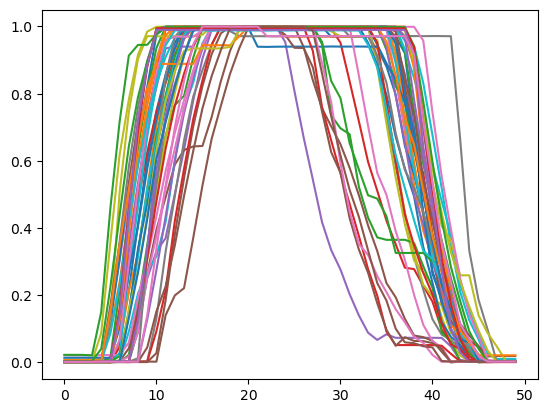

In [14]:
plt.plot(ALT) 

In [17]:
# Création du DataFrame pour enregistrer les résultats
res = pd.DataFrame(columns=["NB", "SUM", "MAE", "MSE", "MAX"])

# Boucle sur les DataFrames dans dsn1
for df in dsn1:
    x = df["ALTN[-]"]  # Données originales
    xr = x.values  # Valeurs originales
    s = x.index  # Index des données
    t0, t1 = s[0].value, s[-1].value  # Bornes temporelles
    t = pd.to_datetime(np.linspace(t0, t1, N))  # Points d'interpolation uniformes
    col = df.index.name  # Nom de l'index
    y = ALT[col]  # Données reconstruites
    yr = np.interp(s, t, y)  # Interpolation aux indices originaux

    # Calcul des métriques d'erreur
    NB = len(xr)
    SUM = np.sum(np.abs(yr - xr))
    MAE = SUM / NB
    MSE = np.sum((yr - xr) ** 2) / NB
    MAX = np.max(np.abs(yr - xr))

    # Mise à jour du DataFrame avec les résultats
    res = pd.concat(
        [res, pd.DataFrame({"NB": [NB], "SUM": [SUM], "MAE": [MAE], "MSE": [MSE], "MAX": [MAX]}, index=[col])]
    )

C:\Users\Dk\AppData\Local\Temp\ipykernel_13980\503734315.py:23: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [18]:
res.head()

,NB,SUM,MAE,MSE,MAX
record_00,7429,14.926664,0.002009,0.000026,0.041120
record_01,7459,23.375906,0.003134,0.000042,0.035835
record_02,7042,17.353760,0.002464,0.000025,0.024027
record_03,6457,13.630503,0.002111,0.000016,0.021386
record_04,4860,13.687590,0.002816,0.000040,0.043595


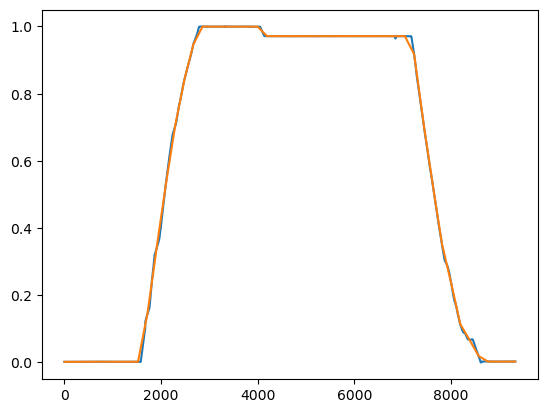

In [22]:
plt.plot(x.values)
plt.plot(yr)

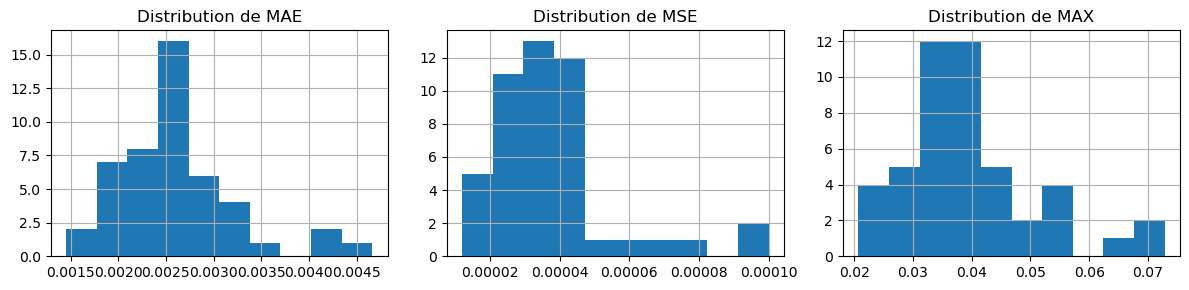

In [23]:
# Configuration de la figure
plt.figure(figsize=(12, 3))

# Histogramme pour MAE
plt.subplot(1, 3, 1)
res["MAE"].hist()
plt.title("Distribution de MAE")

# Histogramme pour MSE
plt.subplot(1, 3, 2)
res["MSE"].hist()
plt.title("Distribution de MSE")

# Histogramme pour MAX
plt.subplot(1, 3, 3)
res["MAX"].hist()
plt.title("Distribution de MAX")

# Affichage des graphiques
plt.tight_layout()
plt.show()

# DTW

In [21]:
def dtw_distance(x, y):
    """
    Fonction pour calculer la distance DTW entre deux séries temporelles x et y.
    """
    n, m = len(x), len(y)
    cost = np.zeros((n, m))
    cost[0, 0] = abs(x[0] - y[0])
    
    # Initialiser les bords de la matrice de coût
    for i in range(1, n):
        cost[i, 0] = cost[i-1, 0] + abs(x[i] - y[0])
    for j in range(1, m):
        cost[0, j] = cost[0, j-1] + abs(x[0] - y[j])
    
    # Remplir la matrice de coût
    for i in range(1, n):
        for j in range(1, m):
            dist = abs(x[i] - y[j])
            cost[i, j] = dist + min(cost[i-1, j], cost[i, j-1], cost[i-1, j-1])
    
    return cost

def dtw_path(cost):
    """
    Fonction pour extraire le chemin optimal de la matrice de coût DTW.
    """
    n, m = cost.shape
    path = []
    i, j = n-1, m-1
    
    while i > 0 or j > 0:
        path.append((i, j))
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_cost = min(cost[i-1, j], cost[i, j-1], cost[i-1, j-1])
            if min_cost == cost[i-1, j]:
                i -= 1
            elif min_cost == cost[i, j-1]:
                j -= 1
            else:
                i -= 1
                j -= 1
    
    path.append((i, j))
    path.reverse()
    return path

def choose_reference_curve(series):
    """
    Fonction pour choisir la courbe de référence basée sur la distance DTW minimale.
    """
    min_distance = float('inf')
    reference_curve = None
    
    # Comparer chaque courbe avec les autres pour calculer les distances DTW
    for i, curve in enumerate(series):
        total_distance = 0
        for j, comparison_curve in enumerate(series):
            if i != j:
                cost = dtw_distance(curve, comparison_curve)
                total_distance += cost[-1, -1]  # Distance DTW à la fin de la matrice de coût
        # Choisir la courbe qui minimise la distance totale
        if total_distance < min_distance:
            min_distance = total_distance
            reference_curve = curve
    
    return reference_curve



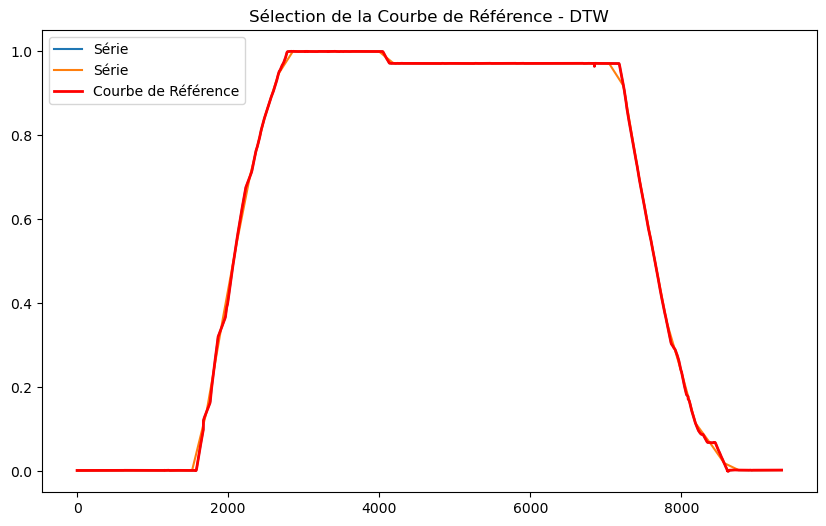

In [ ]:
# courbe de référence
series = [
    x.values,  # Série 1
    yr # Série 2
]

# Choisir la courbe de référence
reference_curve = choose_reference_curve(series)

# Affichage des résultats
plt.figure(figsize=(10, 6))
for curve in series:
    plt.plot(curve, label="Série")
plt.plot(reference_curve, label="Courbe de Référence", color='red', linewidth=2)
plt.title("Sélection de la Courbe de Référence - DTW")
plt.legend()
plt.show()

